In [2]:
import gzip

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binomtest 

pd.set_option("display.max_columns", None)

Read thresholded dataframe with LOH positions

In [3]:
threshold = 4

In [4]:
df = pd.read_csv(f"/home/junkhann/daten/LOH_pos_thresholded/LOH_positions_threshold_{threshold}.tsv.gz", sep="\t", compression="gzip")
len(df)

209

In [5]:
def get_number_ref_alleles(entry: str) -> int:
    return entry.split(",")[0]

In [6]:
def get_number_alt_alleles(entry: str) -> int:
    return entry.split(",")[1]

In [7]:
# tumor_genotype field is "ref,alt"
df["n_ref_alleles"] = df["tumor_genotype"].apply(get_number_ref_alleles)
df["n_alt_alleles"] = df["tumor_genotype"].apply(get_number_alt_alleles)

In [8]:
df.head()

,#CHROM,pos_x,REF,ALT,INFO,sample_control,sample_tumor,start,end,genotype,TCN,PID,normal_genotype,tumor_genotype,quality_score,reads_normal,reads_tumor,CELL_TYPE,RSID,GENE,GENE_ID,A1,A2,A2_FREQ_ONEK1K,A2_FREQ_HRC,position_code,pos_y,position_count,n_ref_alleles,n_alt_alleles
0,1,2073553,A,G,BRF=0.45;FR=0.2606;HP=1;HapScore=2;MGOF=21;MML...,"0/1:-5.09,0,-21.29:7:51:17:4","0/0:0,-0.9,-12.6:21:10:6:0",840009,8439906,1:0,1.0,4100636,"1,1","1,0",14.124316,17,6,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs643076,{'UBE2J2'},{'ENSG00000160087'},A,G,0.70747,0.732261,1-2073553,1-2073553,4,1,0
1,1,2073553,A,G,BRF=0.4;FR=0.2507;HP=1;HapScore=2;MGOF=2;MMLQ=...,"0/1:-14.83,0,-4.83:1:48:9:6","0/0:0,-2.07,-22.4:2:21:8:0",1240050,5560051,1:0,1.0,4128477,"1,1","1,0",17.667007,9,8,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs643076,{'UBE2J2'},{'ENSG00000160087'},A,G,0.70747,0.732261,1-2073553,1-2073553,4,1,0
2,1,2073553,A,G,BRF=0.78;FR=0.3335;HP=1;HapScore=2;MGOF=17;MML...,"0/1:-7.84,0,-11.74:17:78:10:3","./.:0,-0,-4.2:12:3:2:0",1709905,5380014,1:0,1.0,4186613,"1,1","1,0",1.686418,10,2,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs643076,{'UBE2J2'},{'ENSG00000160087'},A,G,0.70747,0.732261,1-2073553,1-2073553,4,1,0
3,1,2073553,A,G,BRF=0.54;FR=0.2929;HP=1;HapScore=2;MGOF=10;MML...,"0/1:-11.04,0,-23.24:10:99:17:6","0/0:0,-0.3,-5:0:5:2:0",1310029,12839977,1:0,1.0,4199848,"1,1","1,0",4.277596,17,2,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs643076,{'UBE2J2'},{'ENSG00000160087'},A,G,0.70747,0.732261,1-2073553,1-2073553,4,1,0
4,1,2897455,T,C,BRF=0.32;FR=0.3341;HP=1;HapScore=8;MGOF=20;MML...,"1/0:-44.1,0,-32.6:15:99:30:16","0/0:0,-0.4,-8:20:5:5:0",840009,8439906,1:0,1.0,4100636,"1,1","1,0",11.770263,30,5,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs3001801,{'WRAP73'},{'ENSG00000116213'},T,C,0.74634,0.754296,1-2897455,1-2897455,4,1,0


In [9]:
len(df[df["n_alt_alleles"] == "0"])

208

Perform binomial test for each position

In [10]:
def get_p_value(df_position: pd.DataFrame) -> tuple[float, float]:
    n = len(df_position)
    df_loss_ref = df_position[df_position["n_alt_alleles"] == "0"]
    k = len(df_loss_ref)
    result = binomtest(k=k, n=n, p=0.5, alternative="greater")
    return result.pvalue

In [11]:
p_values = df.groupby("position_code").apply(get_p_value)

Plot p-values

<Axes: title={'center': 'Distribution of p-values'}, xlabel='p-value', ylabel='Frequency'>

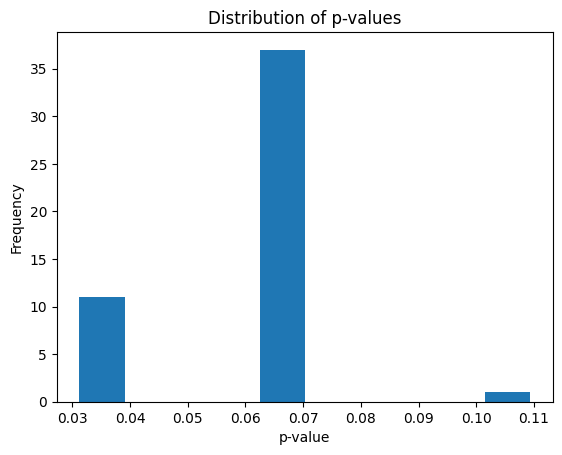

In [13]:
p_values.plot(kind="hist", title="Distribution of p-values", xlabel="p-value")
#plt.yscale("log")